In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATFocus, nets
from NEATModels.config import dynamic_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"


Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/Kepler/CurieTrainingDatasets/foconeatnpz/'
npz_name = 'Foconeat.npz'
npz_val_name = 'FoconeatVal.npz'

#Read and Write the h5 file, directory location and name
model_dir =  '/home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/'
model_name = 'cadhistoned29s4f32resmulti.h5'

In [3]:
#Neural network parameters
focus_categories_json = model_dir + 'FocusCategories.json'
key_categories = load_json(focus_categories_json)
focus_cord_json = model_dir + 'FocusCord.json'
key_cord = load_json(focus_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = True
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 32
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7

mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 29
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-3
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 10

#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
show = True
stage_number = 4
last_conv_factor = 8
size_tminus = 1
size_tplus = 1
imagex = 96
imagey = 96
multievent = True

In [4]:

config = dynamic_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         key_categories = key_categories, key_cord = key_cord,  imagex = imagex,
                         imagey = imagey, size_tminus = size_tminus, size_tplus =size_tplus, epochs = epochs, multievent = multievent,
                         residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel, stage_number = stage_number, last_conv_factor = last_conv_factor,
                         show = show, startfilter = startfilter, batch_size = batch_size, model_name = model_name)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

dynamic_config(batch_size=10, box_vector=6, categories=3, depth=29, epochs=250, imagex=96, imagey=96, key_categories={'Totaloff': 0, 'BestCad': 1, 'BestNuclei': 2}, key_cord={'x': 0, 'y': 1, 'z': 2, 'h': 3, 'w': 4, 'c': 5}, last_conv_factor=8, learning_rate=0.0001, lstm_hidden_unit=16, lstm_kernel=3, mid_kernel=3, model_name='cadhistoned29s4f32resmulti.h5', multievent=True, nboxes=1, npz_directory='/home/sancere/Kepler/CurieTrainingDatasets/foconeatnpz/', npz_name='Foconeat.npz', npz_val_name='FoconeatVal.npz', residual=True, show=True, size_tminus=1, size_tplus=1, stage_number=4, start_kernel=7, startfilter=32, stride=8, yolo_v0=True, yolo_v1=False, yolo_v2=False)


number of  images:	 10819
image size (3D):		 (3, 96, 96)
axes:				 SZYXC
channels in / out:		 1
number of  images:	 570
image size (3D):		 (3, 96, 96)
axes:				 SZYXC
channels in / out:		 1
(3, 96, 96, 1)
sigmoid


2021-08-27 15:52:49.968163: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-08-27 15:52:50.034731: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:17:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 625.94GiB/s
2021-08-27 15:52:50.035005: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-08-27 15:52:50.036412: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-08-27 15:52:50.037859: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2021-08-27 15:52:50.038166: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2

binary
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 3, None, None 0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 3, None, None 11008       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 3, None, None 128         conv3d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 3, None, None 0           batch_normalization_1[0][0]      
_____________________________________________________________________________________

Train on 10819 samples, validate on 570 samples
Epoch 1/250


2021-08-27 15:53:11.316629: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2021-08-27 15:53:12.737684: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


10819/10819 [==============================] - 428s 40ms/step - loss: 2.8636 - accuracy: 0.0083 - val_loss: 2.6999 - val_accuracy: 0.1351

Epoch 00001: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f32resmulti.h5


<Figure size 432x288 with 0 Axes>

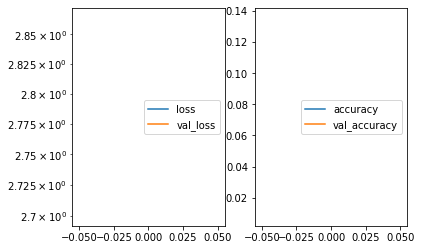

[[9.9974471e-01 1.2234133e-03 5.9862745e-05 4.7644451e-01 5.1405764e-01
  5.0831956e-01 9.9637932e-01 9.9975115e-01 7.0485634e-01]]
True Cell type: Totaloff
x [[[0.4764445]]]
True positional value x 0.5
y [[[0.51405764]]]
True positional value y 0.5
z [[[0.50831956]]]
True positional value z 0.5
h [[[0.9963793]]]
True positional value h 1.0
w [[[0.99975115]]]
True positional value w 1.0
c [[[0.70485634]]]
True positional value c 1.0


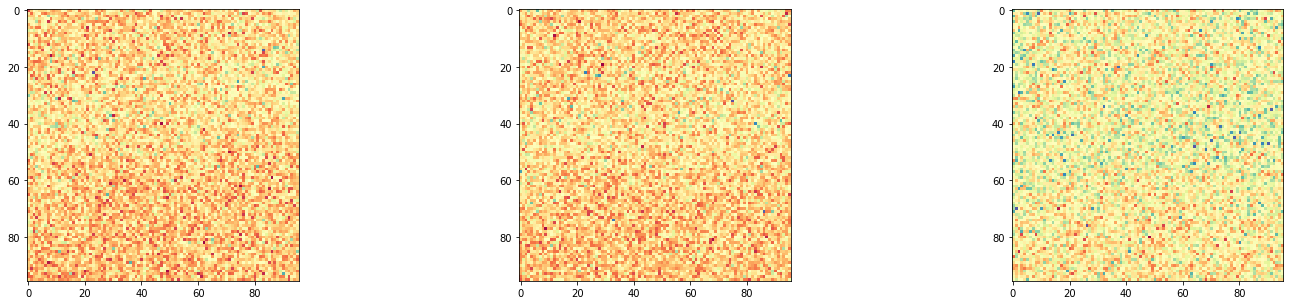

Epoch 2/250
10819/10819 [==============================] - 414s 38ms/step - loss: 2.6772 - accuracy: 0.3299 - val_loss: 2.7324 - val_accuracy: 0.1684

Epoch 00002: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f32resmulti.h5


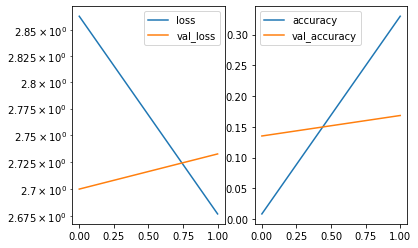

[[4.7191110e-04 4.2319213e-04 9.9935454e-01 5.3669292e-01 5.1815432e-01
  5.2718091e-01 9.9253404e-01 9.9889684e-01 6.3775760e-01]]
True Cell type: BestNuclei
x [[[0.5366929]]]
True positional value x 0.5
y [[[0.5181543]]]
True positional value y 0.5
z [[[0.5271809]]]
True positional value z 0.5
h [[[0.99253404]]]
True positional value h 1.0
w [[[0.99889684]]]
True positional value w 1.0
c [[[0.6377576]]]
True positional value c 1.0


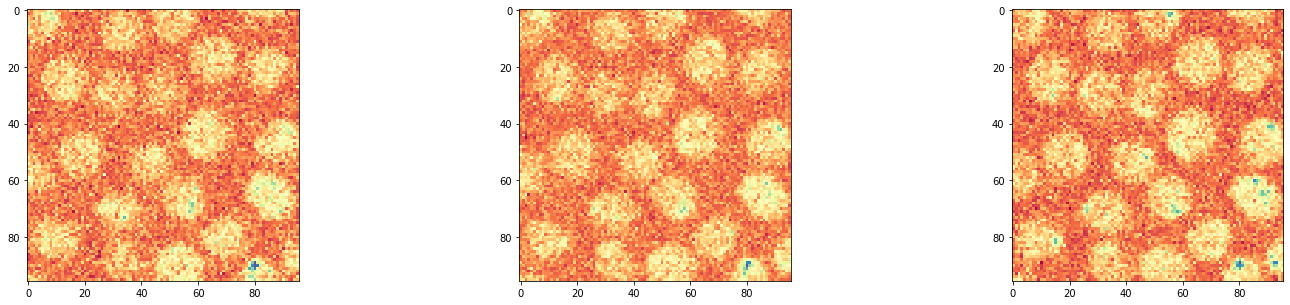

Epoch 3/250
10819/10819 [==============================] - 420s 39ms/step - loss: 2.6489 - accuracy: 0.6706 - val_loss: 2.6433 - val_accuracy: 0.4404

Epoch 00003: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f32resmulti.h5


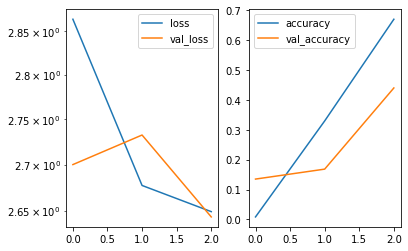

Predicted cell: Totaloff Probability: [[[[9.9977237e-01 7.0040632e-04 2.9040622e-05 4.8407549e-01
    5.1401448e-01 4.9898225e-01 9.9692106e-01 9.9970031e-01
    7.0417064e-01]]]]
True Cell type: Totaloff
x [[[0.4840755]]]
True positional value x 0.5
y [[[0.5140145]]]
True positional value y 0.5
z [[[0.49898225]]]
True positional value z 0.5
h [[[0.99692106]]]
True positional value h 1.0
w [[[0.9997003]]]
True positional value w 1.0
c [[[0.70417064]]]
True positional value c 1.0


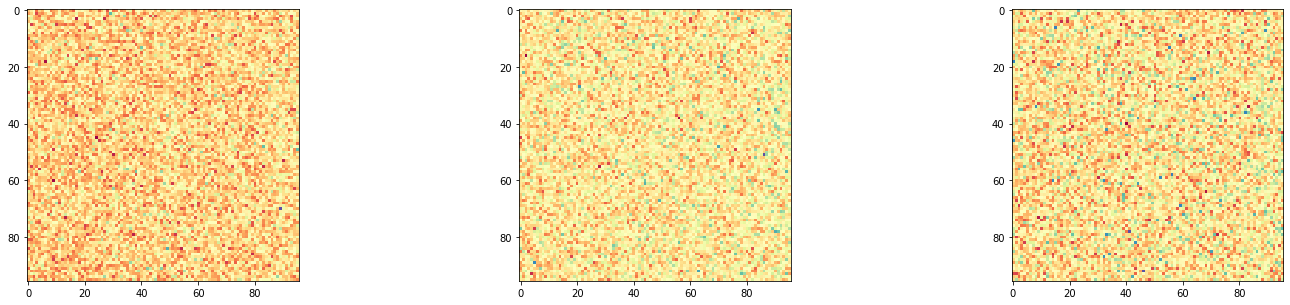

Epoch 4/250
10819/10819 [==============================] - 400s 37ms/step - loss: 2.6323 - accuracy: 0.7869 - val_loss: 2.6295 - val_accuracy: 0.2860

Epoch 00004: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f32resmulti.h5


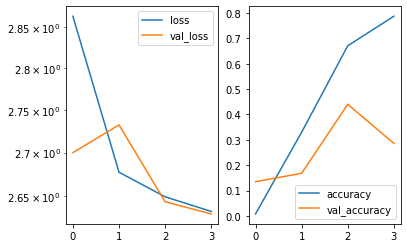

[[9.9964368e-01 1.2600152e-03 7.4333955e-05 4.8554751e-01 5.0314605e-01
  4.9902308e-01 9.9736828e-01 9.9965143e-01 6.7374444e-01]]
True Cell type: Totaloff
x [[[0.4855475]]]
True positional value x 0.5
y [[[0.50314605]]]
True positional value y 0.5
z [[[0.49902308]]]
True positional value z 0.5
h [[[0.9973683]]]
True positional value h 1.0
w [[[0.99965143]]]
True positional value w 1.0
c [[[0.67374444]]]
True positional value c 1.0


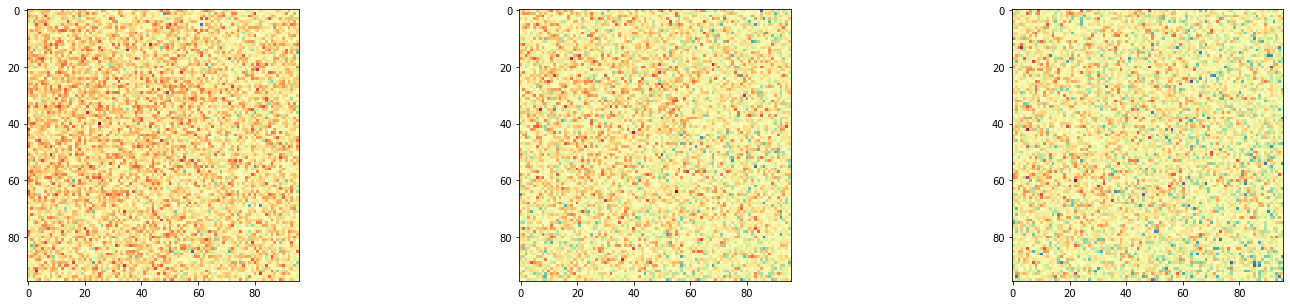

Epoch 5/250
10819/10819 [==============================] - 399s 37ms/step - loss: 2.6196 - accuracy: 0.8275 - val_loss: 2.6100 - val_accuracy: 0.9035

Epoch 00005: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f32resmulti.h5


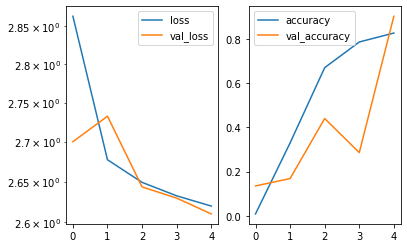

[[3.8897799e-04 9.9874818e-01 1.3201388e-03 4.9515647e-01 5.0630808e-01
  5.0801128e-01 9.9380612e-01 9.9893016e-01 6.6898537e-01]]
True Cell type: BestCad
x [[[0.49515647]]]
True positional value x 0.5
y [[[0.5063081]]]
True positional value y 0.5
z [[[0.5080113]]]
True positional value z 0.5
h [[[0.9938061]]]
True positional value h 1.0
w [[[0.99893016]]]
True positional value w 1.0
c [[[0.66898537]]]
True positional value c 1.0


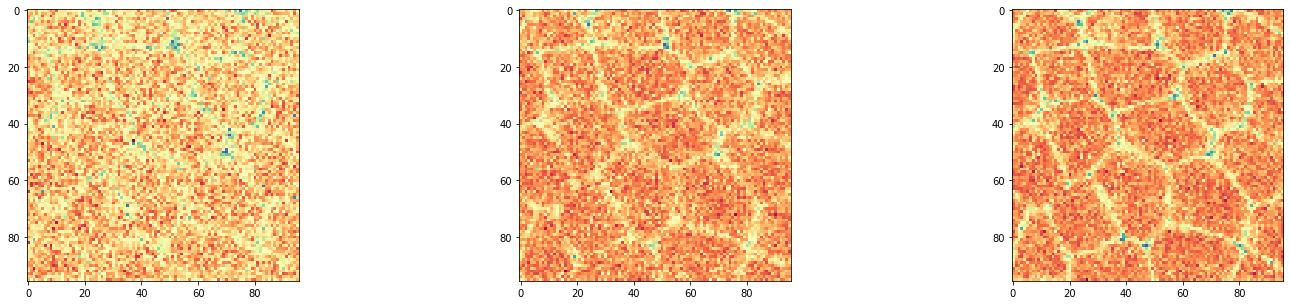

Epoch 6/250
10819/10819 [==============================] - 410s 38ms/step - loss: 2.6081 - accuracy: 0.8318 - val_loss: 2.6421 - val_accuracy: 0.4614

Epoch 00006: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f32resmulti.h5


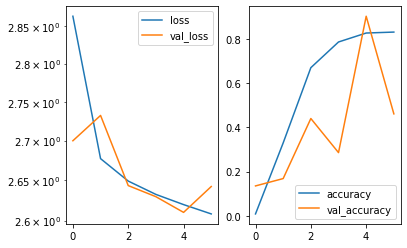

[[9.9933678e-01 7.8432541e-04 1.5776483e-05 4.9895197e-01 5.0560540e-01
  5.1015013e-01 9.9828017e-01 9.9975365e-01 7.0254225e-01]]
True Cell type: Totaloff
x [[[0.49895197]]]
True positional value x 0.5
y [[[0.5056054]]]
True positional value y 0.5
z [[[0.51015013]]]
True positional value z 0.5
h [[[0.99828017]]]
True positional value h 1.0
w [[[0.99975365]]]
True positional value w 1.0
c [[[0.70254225]]]
True positional value c 1.0


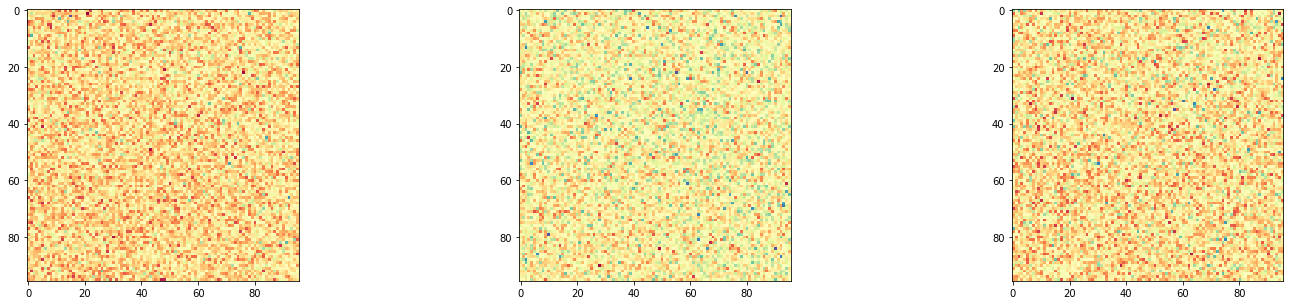

Epoch 7/250
10819/10819 [==============================] - 417s 39ms/step - loss: 2.5970 - accuracy: 0.8427 - val_loss: 6.6962 - val_accuracy: 0.1316

Epoch 00007: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f32resmulti.h5


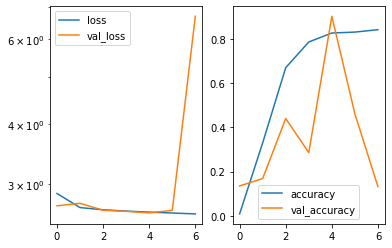

[[1.7591937e-06 9.9530494e-01 2.8746791e-02 5.1167786e-01 5.3980887e-01
  4.9778458e-01 9.9580836e-01 9.9883896e-01 6.6294402e-01]]
True Cell type: BestCad
x [[[0.51167786]]]
True positional value x 0.5
y [[[0.53980887]]]
True positional value y 0.5
z [[[0.49778458]]]
True positional value z 0.5
h [[[0.99580836]]]
True positional value h 1.0
w [[[0.99883896]]]
True positional value w 1.0
c [[[0.662944]]]
True positional value c 1.0


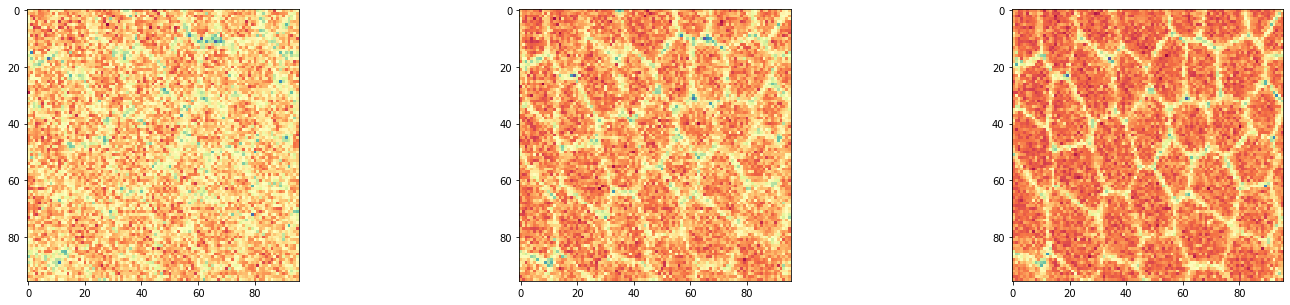

Epoch 8/250
 1010/10819 [=>............................] - ETA: 6:00 - loss: 2.6014 - accuracy: 0.8455

In [ ]:
Train = NEATFocus(config, model_dir, model_name)

Train.loadData()

Train.TrainModel()